# <font color=cyan>X-Sell Personal Loans to Liability product customers</font>

>Personal Loan cross sell campaigns have received a healthy response at Thera Bank. The management now wants to improve the RoI of such campaigns. The marketing team needs to target liability customers who are pre-disposed to buying a personal loan. Our objective here will be to develop a classification model that will use response data from a previous campaign to establish the propensity of conversion for any liability customer

#### <font color=red> Data:</font> 
Personal Loan Cross sell campaign response data for liability customers


#### <font color=red> Attributes:</font>
- Customer ID
- Age (in years)
- Professional Experience (in years)
- Income of the Customer (in thousands of USD)
- Zip Code of residence
- Size of Family
- Average monthly credit card spend ( in thousands of USD)
- Education (Unger Grad, Post Grad, Advanced/Professional)
- Value of home mortgage (in thousands of USD)
- Response to campaign (Whether customer bought a personal loan or no)
- Securities account indicator
- CD account indicator
- Internet banking indicator
- Universal Bank credit card indicator

Given our objective, we can define the Response to campaign (Whether customer bought a personal loan or no) as our dependent variable. This attribute is present in the data by the name of 'Personal Loan'

In [12]:
# Since we will be generating a lot of charts, let's ensure that all matplotlib charts are rendered within the ipython shell

%matplotlib inline 

# Let's avoid printing of warnings
import warnings
warnings.filterwarnings('ignore')

# importing other libraries

import os
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from pandas_profiling import ProfileReport


# <font color=cyan>Loading and checking data</font>

In [13]:
#Let's begin by importing data
campaign_data=pd.read_csv('./Data/Bank_Personal_Loan_Modelling.csv')

In [14]:
#See top rows
campaign_data.head(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [15]:
#Check Data Types of Columns
campaign_data.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [16]:
#Check number of rows and columns
campaign_data.shape

(5000, 14)

In [17]:
#Data info
campaign_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [18]:
# Column names of Data frame
campaign_data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [19]:
# Check duplicates in a data frame
campaign_data.duplicated().sum()

0

In [20]:
# Check the presence of missing values
campaign_data.isnull().sum()+campaign_data.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [11]:
#Five number summary
campaign_data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


***

Certain observations can be made by just looking at the above statistics

***
> - We notice that __none__ of the fields have a missing value
>> - This is important because othewise we would've had to perform exclusions or missing value imputations - but, none of that here

> - The data is for individuals who are __more than 23 years of age__, and includes individuals till the __age of 67__. That's quite a __wide range__
>> - The __mean and the median are fairly close__ to each other which implies a __symmetric distribution__ with __negligible skew__
>> - The 5 number summary suggests __no outliers__

> - Similarly, __Experiece__ ranges from __-3__ to __43__. Here __-3__ is an obvious __abberation__. We will choose to floor the minimum experience value to __zero__ before further analysis
>> - The __mean and the median are fairly close__ to each other which implies a __symmetric distribution__ with __negligible skew__
>> - The 5 number summary suggests __no outliers__ other than the erronous __negative values__


> - The __Income__ has a wide range from __8000__ to __224000__ US Dollars
>> - The income distribution appears to be right skewed with a long tail. 

> - __Average monthly credit card spend__, ranges __0__ to __10000__ US Dollars
>> - The distribution appears to be right skewed with a long tail. 

>> - More than __half__ of the respondents do not have a __mortgage__ and hence the distribution has a right skew.

>> - Zip Code, Family, Education, Personal Loan, Securities Account, CD Account, Online and Credit Card are all categorical variables, with several being binary

>> - Average __Family Size__ is __2.4__ with the median size of __2__
>> - __9.6%__ of the respondents took a __Personal Loan__. This is our __dependent variable__. The response rate indicates __biased distribution__
>>- 10% have Securities Account, 6% have a CD Account and 29% have a Credit Card. Almost 60% respondents use internet banking

***

__It makes sense here to substantiate the above observations through charts and more statistics__


# <font color=cyan>Exploratory Data Analysis</font>

In [ ]:
#Leveraging pandas profiling to investigate data
profile = ProfileReport(campaign_data, title="Pandas Profiling Report", explorative=True)
profile.to_notebook_iframe()

We'll choose to explore categorical and continuous variables independently and ignore the ID variable

In [23]:
cont=['Age','Experience','Income','CCAvg','Mortgage']
cat=['Personal Loan','Securities Account','CD Account','CreditCard','Online','Family','Education','ZIP Code']

In [22]:
# We can also look at the distributions of continuous variables and check for skew
def skew_cat(skew_val):
    if skew_val>0.5:
        return 'skewed towards the tail'
    elif skew_val<-.5:
        return 'skewed towards the head'
    else:
        return 'fairly symmetric'

def skew_chart(x,var):
    print("Distribution of " + str(var))
    sns.distplot(x)
    plt.show()
    print("The skew of "+str(var)+" is "+str(x.skew()) + " which indicates that it is " + skew_cat(x.skew()))

Distribution of Age


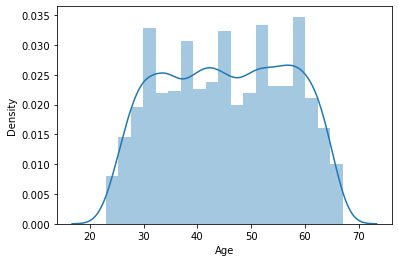

The skew of Age is -0.02934068151284029 which indicates that it is fairly symmetric
Distribution of Experience


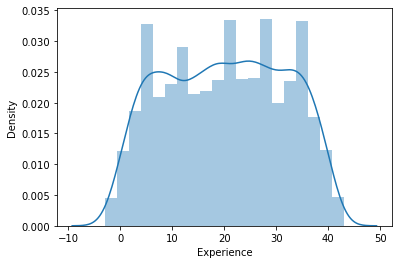

The skew of Experience is -0.026324688402384513 which indicates that it is fairly symmetric
Distribution of Income


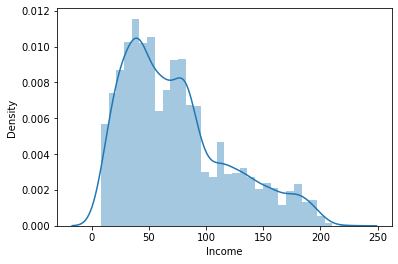

The skew of Income is 0.8413386072610816 which indicates that it is skewed towards the tail
Distribution of CCAvg


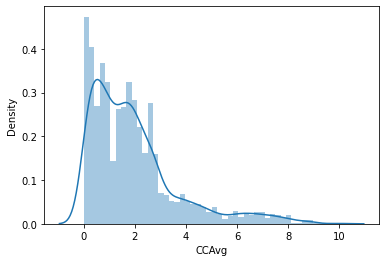

The skew of CCAvg is 1.5984433366678663 which indicates that it is skewed towards the tail
Distribution of Mortgage


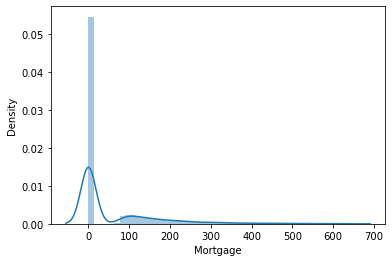

The skew of Mortgage is 2.1040023191079444 which indicates that it is skewed towards the tail


In [24]:
for i in cont:
    skew_chart(campaign_data[i],i)

The distribution confirms the skew in Income and Average Credit Card Spends

A large majority of accounts do not have Mortgage

Let's also check for Outliers

In [25]:
def outlier(dat,x,val):
      print("Box Plot for " + str(val))
      sns.set_style("dark")
      sns.boxplot(x)
      plt.show()
      print("As per the 'Median +/- 1.5 times IQR")
      med=x.median()
      upq=np.percentile(x,75)
      lwq=np.percentile(x,25)
      iqr=upq-lwq
      print (med,upq,lwq,iqr)

      print("For "+str(val)+" there are " + str(len(dat[x<(med-1.5*(iqr))])) + " outliers on the lower side")
      print("For "+str(val)+" there are " + str(len(dat[x>(med+1.5*(iqr))])) + " outliers on the upper side")
      print('----------')

Box Plot for Age


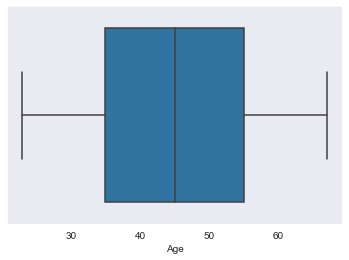

As per the 'Median +/- 1.5 times IQR
45.0 55.0 35.0 20.0
For Age there are 0 outliers on the lower side
For Age there are 0 outliers on the upper side
----------
Box Plot for Experience


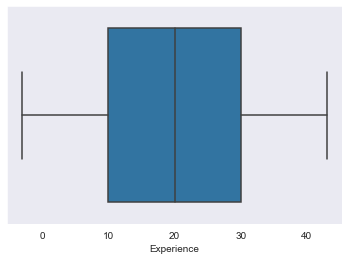

As per the 'Median +/- 1.5 times IQR
20.0 30.0 10.0 20.0
For Experience there are 0 outliers on the lower side
For Experience there are 0 outliers on the upper side
----------
Box Plot for Income


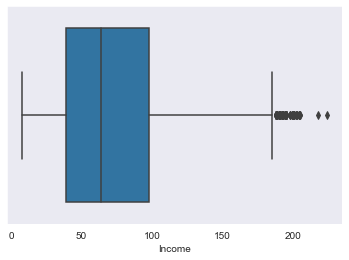

As per the 'Median +/- 1.5 times IQR
64.0 98.0 39.0 59.0
For Income there are 0 outliers on the lower side
For Income there are 423 outliers on the upper side
----------
Box Plot for CCAvg


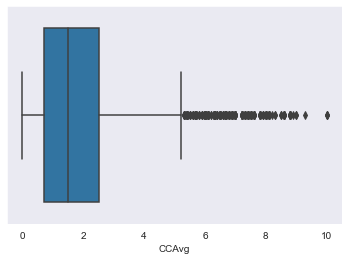

As per the 'Median +/- 1.5 times IQR
1.5 2.5 0.7 1.8
For CCAvg there are 0 outliers on the lower side
For CCAvg there are 517 outliers on the upper side
----------
Box Plot for Mortgage


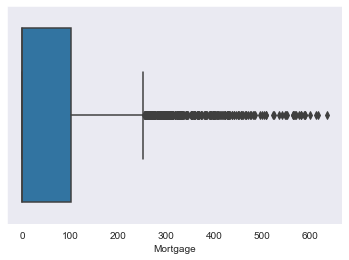

As per the 'Median +/- 1.5 times IQR
0.0 101.0 0.0 101.0
For Mortgage there are 0 outliers on the lower side
For Mortgage there are 776 outliers on the upper side
----------


In [26]:
for i in cont:
    outlier(campaign_data,campaign_data[i],i)

Income, Credit Card Spend and Mortgage, as expected has large outliers

Now, let's look at some countplots for categorical variables

Count Plot for Personal Loan


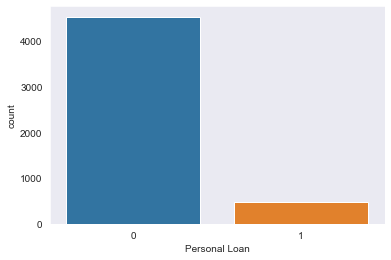

Count Plot for Securities Account


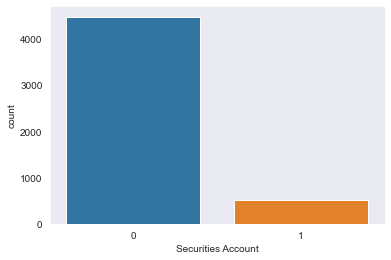

Count Plot for CD Account


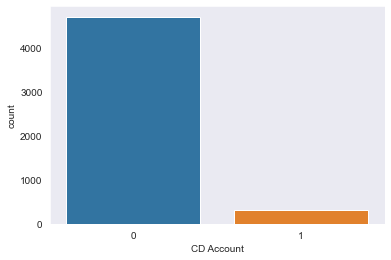

Count Plot for CreditCard


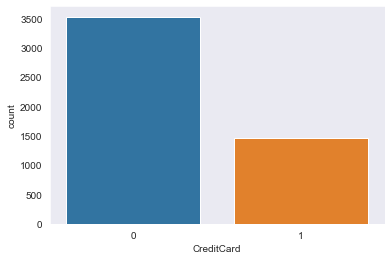

Count Plot for Online


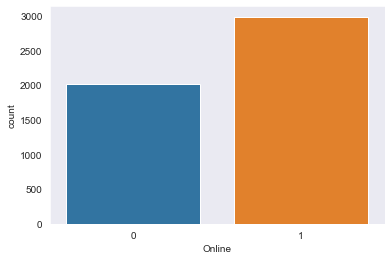

Count Plot for Family


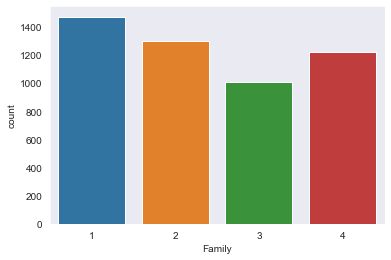

Count Plot for Education


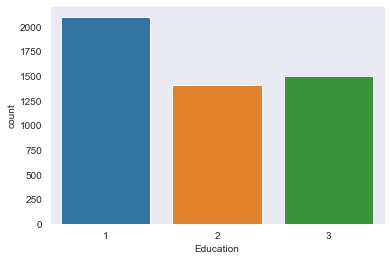

Count Plot for ZIP Code


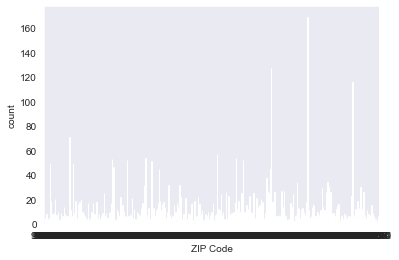

In [27]:
for i in cat:
    print("Count Plot for "+ i)
    sns.countplot(campaign_data[i])
    plt.show()

In [45]:
cat2=[item for item in cat if 'ZIP' not in item]
[campaign_data[item].value_counts(normalize=True,sort=True)*100 for item in cat2]



[0    90.4
 1     9.6
 Name: Personal Loan, dtype: float64,
 0    89.56
 1    10.44
 Name: Securities Account, dtype: float64,
 0    93.96
 1     6.04
 Name: CD Account, dtype: float64,
 0    70.6
 1    29.4
 Name: CreditCard, dtype: float64,
 1    59.68
 0    40.32
 Name: Online, dtype: float64,
 1    29.44
 2    25.92
 4    24.44
 3    20.20
 Name: Family, dtype: float64,
 1    41.92
 3    30.02
 2    28.06
 Name: Education, dtype: float64]

> 9.6% of the respondents accepted a Personal Loan Offer

> 10.44% of respondents had a Securities Account

> Only 6% of the respondents had a CD Account

> 29.4% of the respondents owned a credit card

> Almost 60% of the respondents used internet banking

> The median family size is 2 with family size of 1 being the highest with a proportion of 29.44%

> The largest proportion of respondents (41.92%) had an undergrad degree

#### Pairplot

Bivariate relationships of all numeric fields 



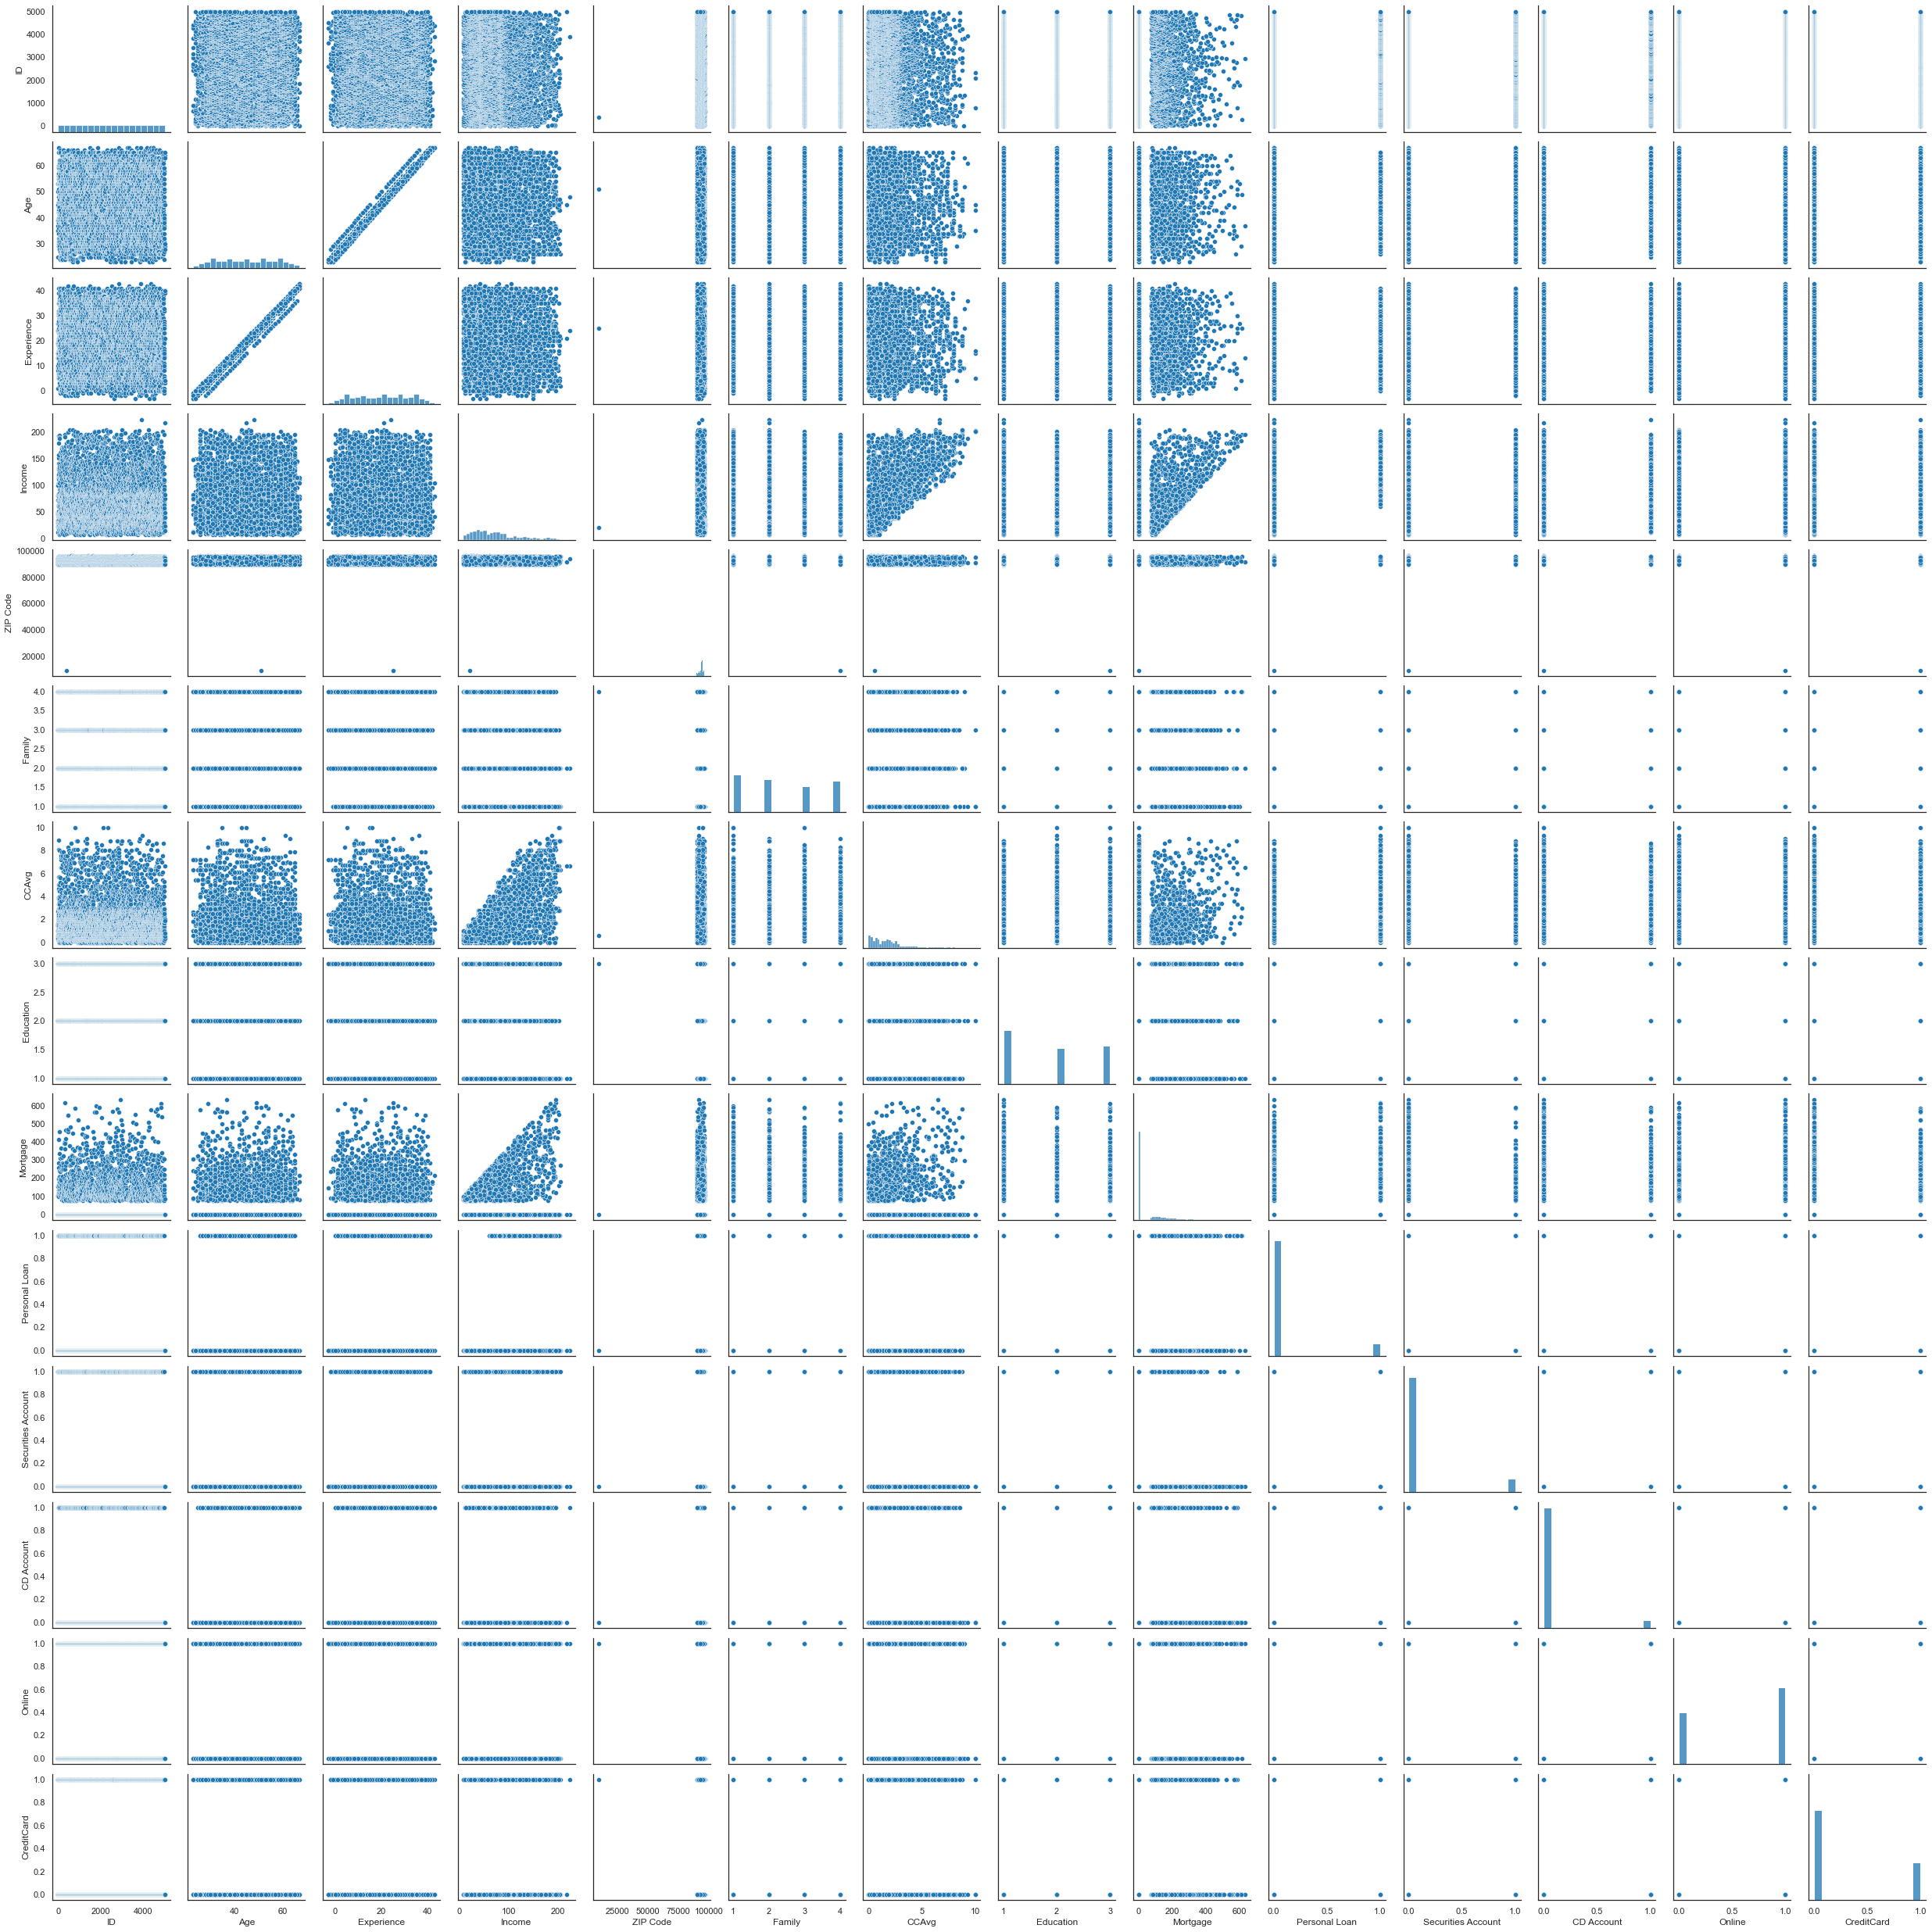

In [46]:
print("Bivariate relationships of all numeric fields \n")
sns.set_context("notebook")
sns.set_style("white")
sns.pairplot(campaign_data)
plt.show()

A lot of the findings from the profiling report are confirmed here

__There seems to be a clear relationship between Age and Experience__

__Average Credit Card Spend and Home Mortgage Value have  a relationship with Income__

__Income also seems to have a relationship with our dependent variable Personal Loan__


Relationship of Age with the response to Personal Loan offer




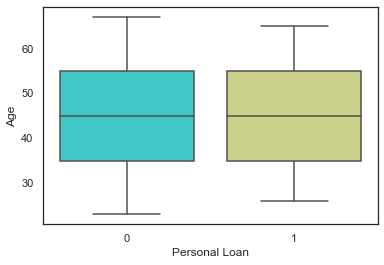

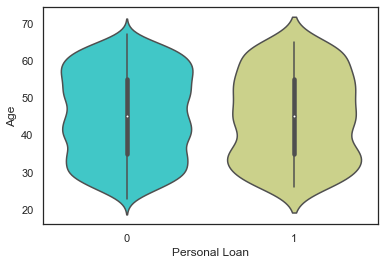

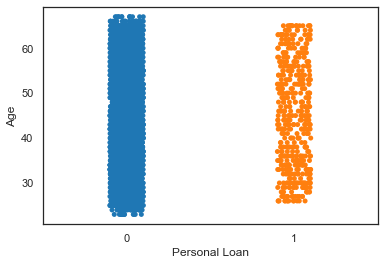

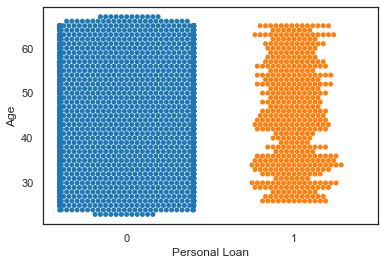



Relationship of Experience with the response to Personal Loan offer




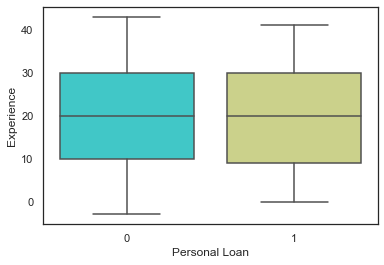

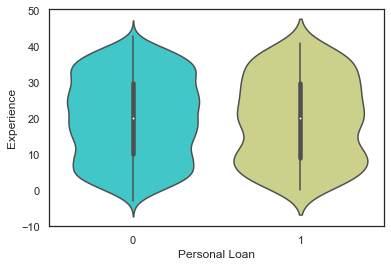

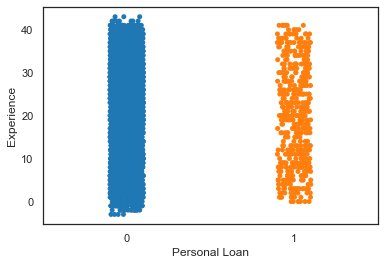

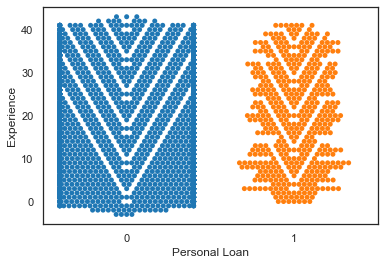



Relationship of Income with the response to Personal Loan offer




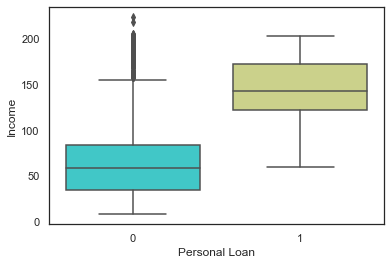

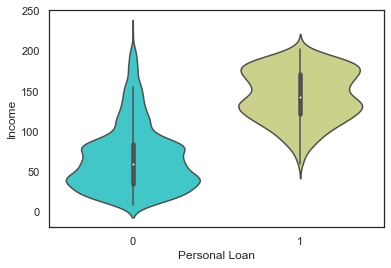

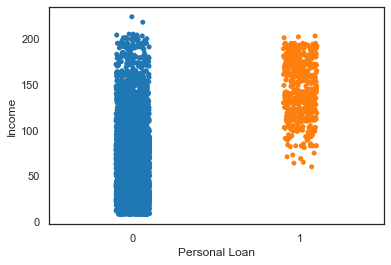

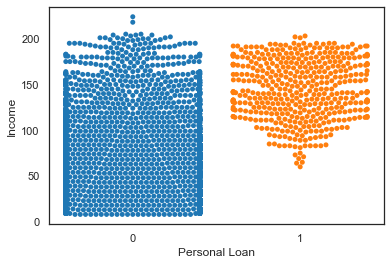



Relationship of CCAvg with the response to Personal Loan offer




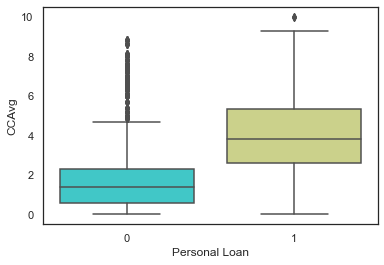

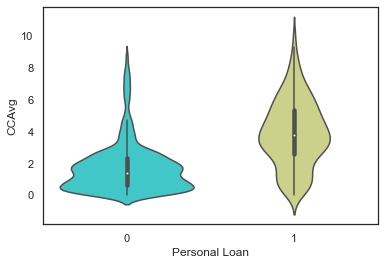

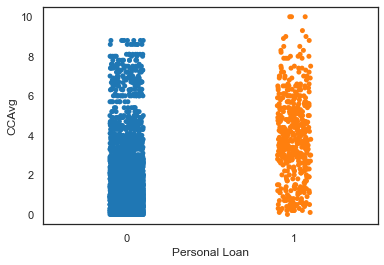

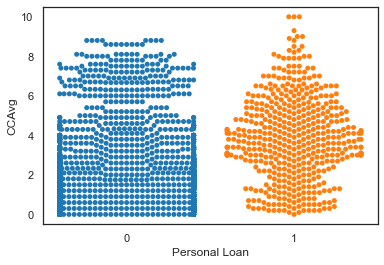



Relationship of Mortgage with the response to Personal Loan offer




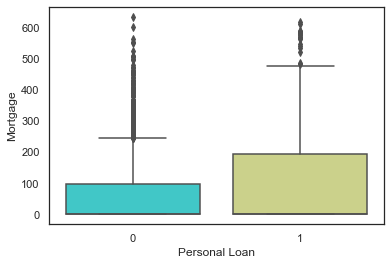

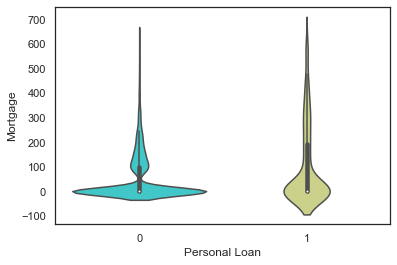

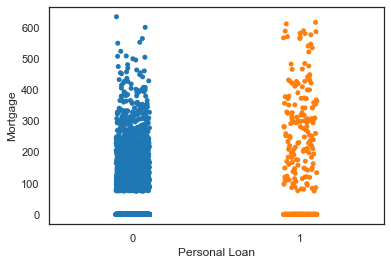

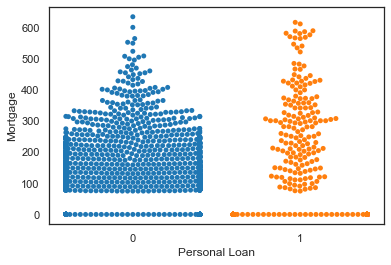

In [51]:
for i in cont:
    print("Relationship of " + i + " with the response to Personal Loan offer")
    print("\n")
    sns.boxplot(x='Personal Loan',y=i,data=campaign_data,palette='rainbow')
    plt.show()
    sns.violinplot(x="Personal Loan", y=i, data=campaign_data,palette='rainbow')
    plt.show()
    sns.stripplot(x="Personal Loan", y=i, data=campaign_data)
    plt.show()
    sns.swarmplot(x="Personal Loan", y=i, data=campaign_data)
    plt.show()
    print("\n")